#**GRIP Task 2: Prediction using Unsupervised ML**

###Name: SOUGATA KHAN

We have to predict the optimum number of clusters from the Iris dataset and represent it visually


**Importing libraries and visualising the data**

We first load the libraries required for our work and then we read the dataset


In [18]:
#Luckily, we do not need any other library for this work.
#Reading the dataset
df<-read.csv('/Iris.csv',header=T)
dim(df)#dimensions of the dataset
names(df)#column names of the dataset
head(df)#a brief preview of the dataset
summary(df)#a brief summary of the dataset

[1] 150   6

[1] "Id"            "SepalLengthCm" "SepalWidthCm"  "PetalLengthCm"
[5] "PetalWidthCm"  "Species"

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa


       Id         SepalLengthCm    SepalWidthCm   PetalLengthCm  
 Min.   :  1.00   Min.   :4.300   Min.   :2.000   Min.   :1.000  
 1st Qu.: 38.25   1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600  
 Median : 75.50   Median :5.800   Median :3.000   Median :4.350  
 Mean   : 75.50   Mean   :5.843   Mean   :3.054   Mean   :3.759  
 3rd Qu.:112.75   3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100  
 Max.   :150.00   Max.   :7.900   Max.   :4.400   Max.   :6.900  
  PetalWidthCm     Species         
 Min.   :0.100   Length:150        
 1st Qu.:0.300   Class :character  
 Median :1.300   Mode  :character  
 Mean   :1.199                     
 3rd Qu.:1.800                     
 Max.   :2.500                     

**Determining the value of k**

We then determine the value of k(optimum number of clusters) for the KMeans clustering. We use the Elbow Method for determining the value of k.



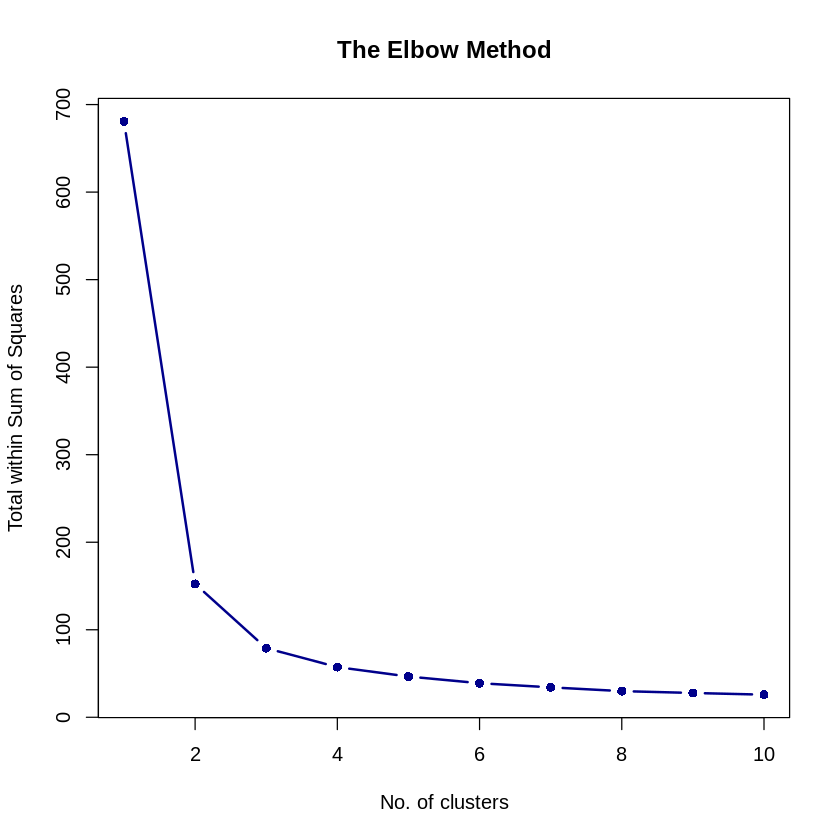

In [19]:
#Finding the optimum value of clusters
twss<-sapply(1:10,function(k){kmeans(df[,-c(1,6)],k,iter.max=300,nstart=20)$tot.withinss})
plot(c(1:10),twss,type='b',lwd=2,col='dark blue',pch=16,
     ylab='Total within Sum of Squares',
     xlab='No. of clusters',
     main='The Elbow Method')

From the above graph, we note that the the elbow occurs at 3.



**Applying to the dataset**

We now apply the kmeans method to our dataset, with the number of clusters as 3.


In [20]:
#Applying the kmeans to our dataset
KMeans<-kmeans(df[,-c(1,6)],3,iter.max=300,nstart=20)
cluster<-fitted(KMeans,'classes')
centroids<-as.data.frame(unique(fitted(KMeans,'centers')))
     

**Visualising the clusters**

We visualise the clusters in the form of two scatterplots.

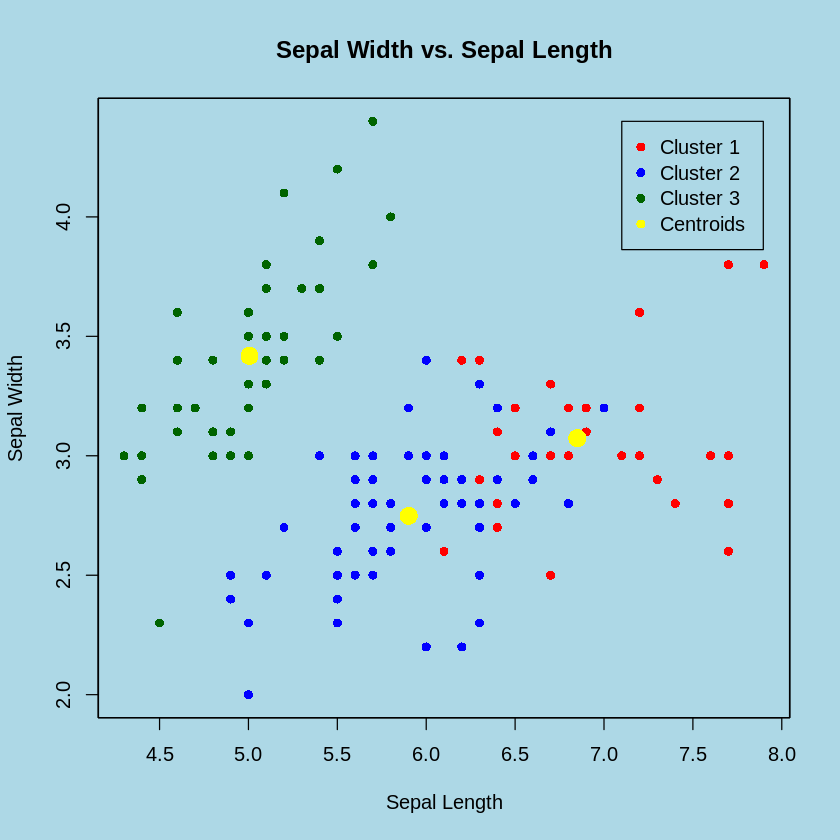

In [21]:
#1st scatterplot
par(bg='light blue')
plot(df[cluster==1,]$SepalLengthCm,
     df[cluster==1,]$SepalWidthCm,
     xlim=c(min(df$SepalLengthCm),max(df$SepalLengthCm)),
     ylim=c(min(df$SepalWidthCm),max(df$SepalWidthCm)),
     col='red',pch=16,main='Sepal Width vs. Sepal Length',
     xlab='Sepal Length',ylab='Sepal Width')
par(new=T)
plot(df[cluster==2,]$SepalLengthCm,
     df[cluster==2,]$SepalWidthCm,
     xlim=c(min(df$SepalLengthCm),max(df$SepalLengthCm)),
     ylim=c(min(df$SepalWidthCm),max(df$SepalWidthCm)),
     col='blue',pch=16,xaxt='n',yaxt='n',xlab=NA,ylab=NA)
par(new=T)
plot(df[cluster==3,]$SepalLengthCm,
     df[cluster==3,]$SepalWidthCm,
     xlim=c(min(df$SepalLengthCm),max(df$SepalLengthCm)),
     ylim=c(min(df$SepalWidthCm),max(df$SepalWidthCm)),
     col='dark green',pch=16,xaxt='n',yaxt='n',xlab=NA,ylab=NA)
par(new=T)
plot(centroids$SepalLengthCm,centroids$SepalWidthCm,
     xlim=c(min(df$SepalLengthCm),max(df$SepalLengthCm)),
     ylim=c(min(df$SepalWidthCm),max(df$SepalWidthCm)),
     col='yellow',pch=16,cex=2,xaxt='n',yaxt='n',xlab=NA,ylab=NA)
legend(x=7.1,y=4.4,c('Cluster 1','Cluster 2','Cluster 3','Centroids'),
       col=c('red','blue','dark green','yellow'),pch=16)

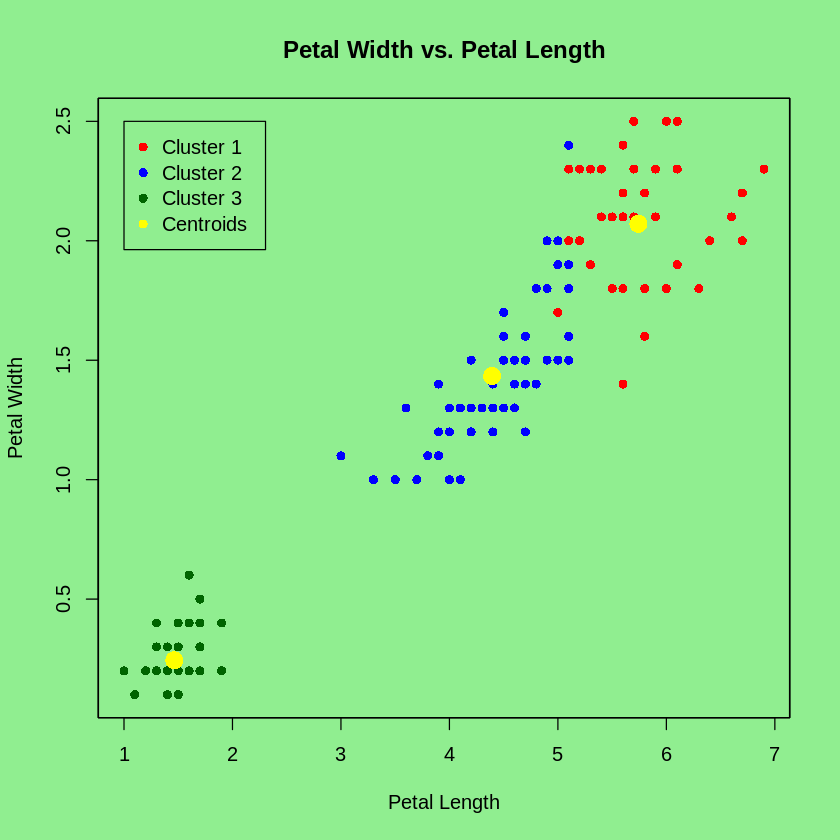

In [22]:
#2nd scatterplot
par(bg='light green')
plot(df[cluster==1,]$PetalLengthCm,
     df[cluster==1,]$PetalWidthCm,
     xlim=c(min(df$PetalLengthCm),max(df$PetalLengthCm)),
     ylim=c(min(df$PetalWidthCm),max(df$PetalWidthCm)),
     col='red',pch=16,main='Petal Width vs. Petal Length',
     xlab='Petal Length',ylab='Petal Width')
par(new=T)
plot(df[cluster==2,]$PetalLengthCm,
     df[cluster==2,]$PetalWidthCm,
     xlim=c(min(df$PetalLengthCm),max(df$PetalLengthCm)),
     ylim=c(min(df$PetalWidthCm),max(df$PetalWidthCm)),
     col='blue',pch=16,xaxt='n',yaxt='n',xlab=NA,ylab=NA)
par(new=T)
plot(df[cluster==3,]$PetalLengthCm,
     df[cluster==3,]$PetalWidthCm,
     xlim=c(min(df$PetalLengthCm),max(df$PetalLengthCm)),
     ylim=c(min(df$PetalWidthCm),max(df$PetalWidthCm)),
     col='dark green',pch=16,xaxt='n',yaxt='n',xlab=NA,ylab=NA)
par(new=T)
plot(centroids$PetalLengthCm,centroids$PetalWidthCm,
     xlim=c(min(df$PetalLengthCm),max(df$PetalLengthCm)),
     ylim=c(min(df$PetalWidthCm),max(df$PetalWidthCm)),
     col='yellow',cex=2,pch=16,xaxt='n',yaxt='n',xlab=NA,ylab=NA)
legend(x=1,y=2.5,c('Cluster 1','Cluster 2','Cluster 3','Centroids'),
       col=c('red','blue','dark green','yellow'),pch=16)


Finally, we create a table summarising the clusters.

**Summary of the Table**

In [23]:
#Summary Table
table(KMeans$cluster,df$Species)

   
    Iris-setosa Iris-versicolor Iris-virginica
  1           0               2             36
  2           0              48             14
  3          50               0              0

From the table above, we find that the members of Iris-setosa were clustered correctly. However, there is some discrepancy regarding the clusters of the other two species: Iris-versicolor and Iris-virginica